# **Green Innovation and Economic Growth: Function-Based Pipeline**

This notebook serves as the main execution pipeline that **calls modular Python scripts** to run the complete analysis — from data cleaning and merging to regression estimation and IRF plotting.

## **Overview**

The workflow is broken into modular functions across multiple `.py` scripts. This notebook coordinates them to streamline the empirical analysis.

## **Pipeline Components**

1. **Table Creation & Merging**  
   **Join** patent, assignee, location, and IPC tables using DuckDB.

2. **Green Patent Tagging**  
   **Identify** green technologies using IPC classifications from `combined_ipc_codes.xlsx`.

3. **Panel Construction**  
   **Aggregate** patent data by country, year, and green status.

4. **Country Code Harmonization**  
   **Standardize** country identifiers and **merge** with GDP panel data.

5. **Regression & IRF Estimation**  
   **Estimate** impulse responses of GDP growth to green vs. non-green patenting activity.

6. **Visualization**  
   **Plot and save** IRF comparison figures to the `fig/` folder.

---

### **Load and Join Patent Tables**

This step runs the script `load_patent_data.py` to create and join the patent, assignee, location, and IPC tables using DuckDB. It constructs the `patent_joined` view for downstream analysis.

In [13]:
%run load_patent_data.py

Index(['patent_id', 'patent_type', 'patent_date', 'patent_title', 'wipo_kind',
       'num_claims', 'withdrawn', 'filename', 'assignee_sequence',
       'assignee_id', 'raw_assignee_individual_name_first',
       'raw_assignee_individual_name_last', 'raw_assignee_organization',
       'assignee_type', 'rawlocation_id', 'location_id', 'raw_city',
       'raw_state', 'raw_country', 'ipc_sequence', 'classification_level',
       'section', 'ipc_class', 'subclass', 'main_group', 'subgroup',
       'classification_value', 'classification_status',
       'classification_data_source', 'action_date', 'ipc_version_indicator'],
      dtype='object')


### **Load GDP per Capita Data**

This step runs `gdp_per_capita_loader.py`, which downloads and processes IMF WEO data to extract country-level GDP per capita (in USD) from 2006 to 2022.

In [19]:
%run gdp_per_capita_loader.py

Already downloaded 2025-Apr WEO dataset at weo_2025_1.csv
  country  year  gdp_per_capita
0     ABW  2006       22734.054
1     ABW  2007       24605.935
2     ABW  2008       26166.555
3     ABW  2009       23394.098
4     ABW  2010       22460.205


### **Map Green Patents (US Only)**

This step connects to the local DuckDB database and calls `generate_us_green_patent_map()`, which aggregates green vs. non-green patent counts by state and year for the United States.

In [15]:
import duckdb
from map_green_patents_us import generate_us_green_patent_map

con = duckdb.connect("patentsview.ddb")
generate_us_green_patent_map(con)

Processing rows 0 to 1000000...
Processing rows 1000000 to 2000000...
Processing rows 2000000 to 3000000...
Processing rows 3000000 to 4000000...
Processing rows 4000000 to 5000000...
Processing rows 5000000 to 6000000...
Processing rows 6000000 to 7000000...
Processing rows 7000000 to 8000000...
Processing rows 8000000 to 9000000...
Processing rows 9000000 to 10000000...
Processing rows 10000000 to 11000000...
Processing rows 11000000 to 12000000...


### **Clean and Aggregate Patent Data**

This step runs the script `clean_patent_data.py`, which processes raw patent records in chunks, constructs full IPC codes, flags green patents, and aggregates yearly patent counts by country and green status.

In [16]:
%run clean_patent_data.py

Processing rows 0 to 1000000...
Processing rows 1000000 to 2000000...
Processing rows 2000000 to 3000000...
Processing rows 3000000 to 4000000...
Processing rows 4000000 to 5000000...
Processing rows 5000000 to 6000000...
Processing rows 6000000 to 7000000...
Processing rows 7000000 to 8000000...
Processing rows 8000000 to 9000000...
Processing rows 9000000 to 10000000...
Processing rows 10000000 to 11000000...
Processing rows 11000000 to 12000000...
Processing rows 12000000 to 13000000...
Processing rows 13000000 to 14000000...
Processing rows 14000000 to 15000000...
Processing rows 15000000 to 16000000...
Processing rows 16000000 to 17000000...
Processing rows 17000000 to 18000000...
Processing rows 18000000 to 19000000...
Processing rows 19000000 to 20000000...
Processing rows 20000000 to 21000000...
Processing rows 21000000 to 22000000...
Processing rows 22000000 to 23000000...
Processing rows 23000000 to 24000000...
Processing rows 24000000 to 25000000...
Processing rows 25000000 

### **Merge Patent Data with GDP**

This step standardizes country codes using ISO-3 formats and merges the cleaned patent panel with GDP per capita data by country and year.

In [22]:
from merge_country_gdp import map_country_codes, merge_with_gdp

panel_final = map_country_codes(panel_df)
merged_panel = merge_with_gdp(panel_final, panel_gdp)

merged_panel.head()

Mapped countries: 201
Unmapped countries: 6


,raw_country,year,is_green,patent_count,clean_country,imf_country,country,gdp_per_capita
0,AD,2013,False,2,AD,AND,AND,45630.195
1,AD,2014,False,1,AD,AND,AND,46299.282
2,AD,2016,False,2,AD,AND,AND,39595.317
3,AD,2017,False,19,AD,AND,AND,40017.741
4,AD,2018,False,17,AD,AND,AND,42229.903


### **Run Regressions and Generate IRFs**

This step runs panel regressions to estimate impulse response functions (IRFs) of GDP growth following green and non-green patenting activity, and saves the resulting plot.

/Users/brittany/Documents/Grad/Predoc/Data task/On Going/IMF/real/rep/run_regression_irf.py:24: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Users/brittany/Documents/Grad/Predoc/Data task/On Going/IMF/real/rep/run_regression_irf.py:40: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/linearmodels/panel/data.py:416: RuntimeWarning:

divide by zero encountered in matmul

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/linearmodels/panel/data.py:41

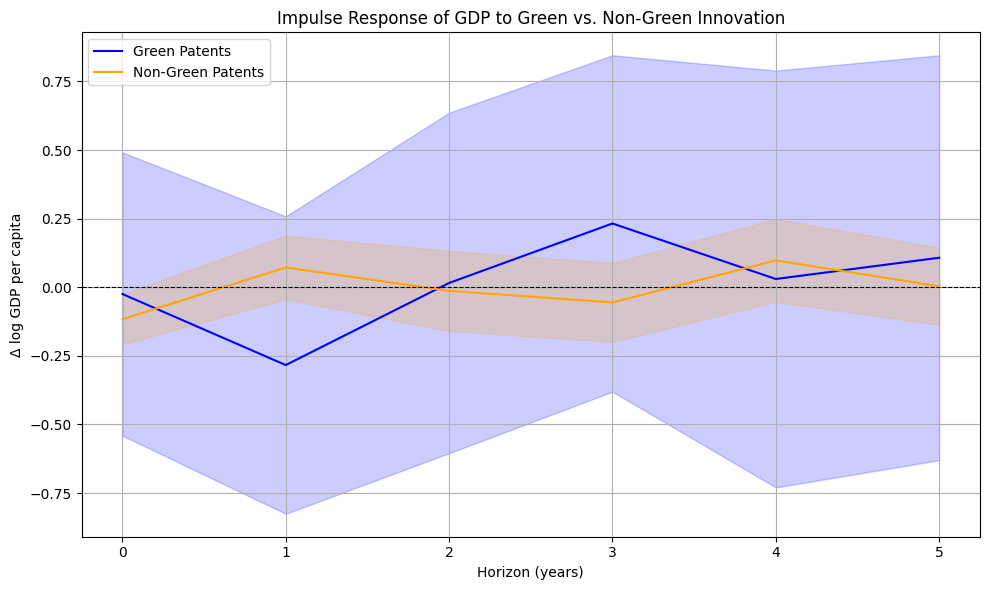

In [30]:
from run_regression_irf import run_regression_irf_pipeline

df_green, df_non_green = run_regression_irf_pipeline(merged_panel)